In [25]:
pwd

'C:\\Users\\patha'

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

titanic=pd.read_csv('titanic.csv')

In [158]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [57]:
#no.of rows
print('# of passengers in original data:'+str(len(titanic.index)))

# of passengers in original data:891


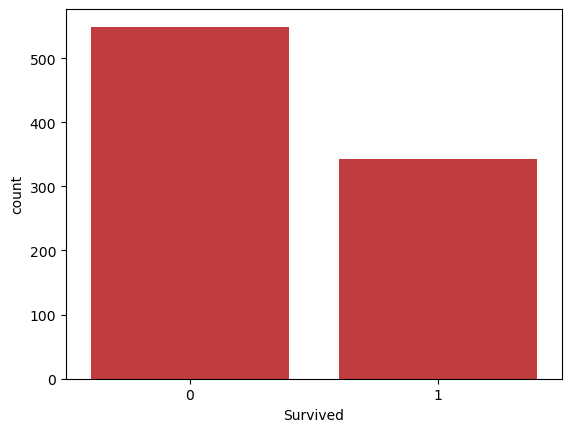

In [73]:
sns.countplot(x="Survived",data=titanic)
plt.show()

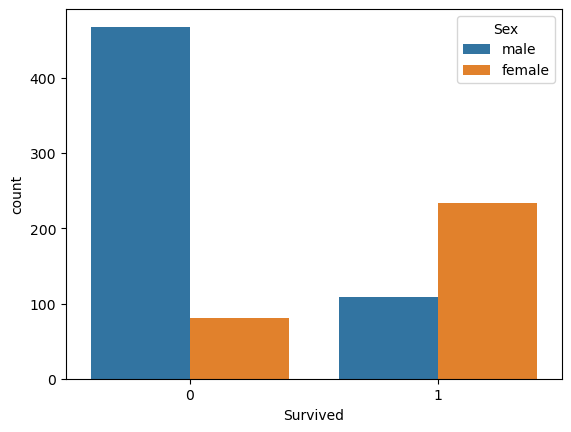

In [77]:
sns.countplot(x="Survived",hue="Sex",data=titanic)
plt.show()

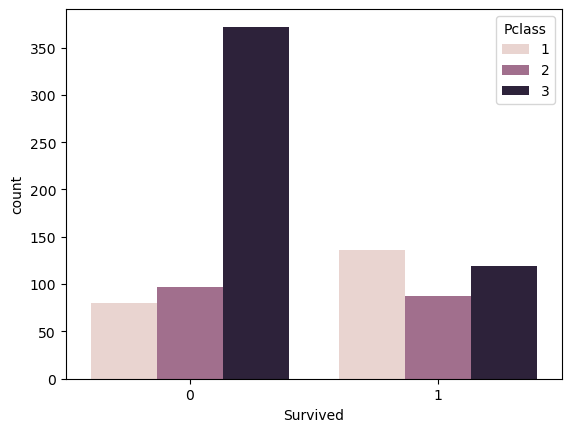

In [79]:
sns.countplot(x="Survived",hue="Pclass",data=titanic)
plt.show()

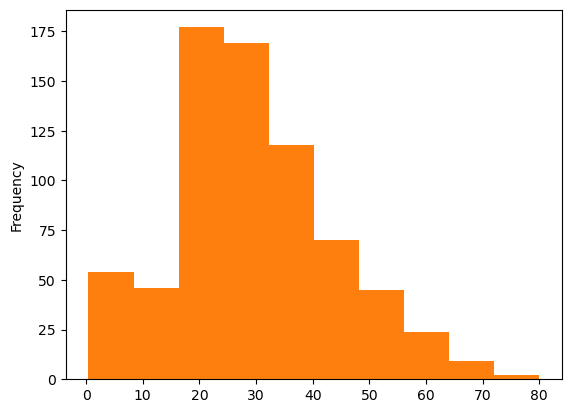

In [87]:
titanic['Age'].plot.hist()
plt.show()

In [156]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [103]:
#checking for null
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          685
Embarked         2
dtype: int64

In [164]:
#dropping irrelevant cols
titanic.drop("Cabin",axis=1,inplace=True)
titanic.drop("Name",axis=1,inplace=True)
titanic.drop("Ticket",axis=1,inplace=True)
 

In [184]:
#converting categorial data through one hot ot label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
titanic['Sex_male'] = encoder.fit_transform(titanic['Sex_male'])  # 'male' -> 1, 'female' -> 0

In [188]:
#scaling or normalizing 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']]) 

In [190]:
#train ,test
X=titanic.drop("Survived",axis=1)
y=titanic["Survived"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,1,False,True
1,2,1,1,0.663861,1,0,0.786845,0,False,False
2,3,1,3,-0.258337,0,0,-0.488854,0,False,True
3,4,1,1,0.433312,1,0,0.420730,0,False,True
4,5,0,3,0.433312,0,0,-0.486337,1,False,True


In [192]:
from sklearn.model_selection import train_test_split

In [194]:
#splitting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [196]:
from sklearn.linear_model import LogisticRegression

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-fit the model using the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [208]:
predictions=model.predict(X_test)

C:\Users\patha\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [210]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.33      0.03      0.05       106\n           1       0.39      0.92      0.55        73\n\n    accuracy                           0.39       179\n   macro avg       0.36      0.47      0.30       179\nweighted avg       0.36      0.39      0.26       179\n'

In [214]:
 from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(cm)
'''
- **Rows**: Represent actual labels (`y_test`).
- **Columns**: Represent predicted labels (`predictions`).
- The numbers indicate:
  - **True negatives (TN)**: Correctly predicted passengers who did not survive.
  - **False positives (FP)**: Incorrectly predicted as survived but didn't.
  - **True positives (TP)**: Correctly predicted as survived.
  - **False negatives (FN)**: Incorrectly predicted as did not survive but did.

'''





[[  3 103]
 [  6  67]]
